#<center>About parameters on the SIRD model</center>
<h3><center>Miguel Moreno (miguelmath.com)</center></h3> 

##Introduction
<p align="justify">
In this notebook we use Python to simulate a model of epidemioology, the model that we will use is a simplification of the SIRD model with vaccine. The goal of this notebook is to show how small changes in the parameters may produce big changes in the simulation.

This notebook is to show an example of how mathematics is applied to other fields. It is not a notebook about epidemiology.
</p>



##Acknowledgment
This notebook is based on the implementation of the SIR model made by Francisco Camacho in Platzi.


##The Model
<p align="justify">
We will work with a SIRD model with vaccination. We will use the following functions in our model:
$$S(t)\text{ the susceptible people at the time } t.$$ 
$$I(t)\text{ the infected people at the time } t.$$
$$R(t)\text{ the recovered people at the time } t.$$
$$D(t)\text{ the dead people at the time } t.$$
$$V(t)\text{ the vaccinated people at the time } t.$$
</p>
<br>
<p align="justify">
The model will have the following parameters: 
$$N\text{ the size of the population.} $$
$$\beta\text{ the infection rate. }$$
$$\mu\text{ the recovery rate. }$$
$$\delta\text{ the mortality rate.} $$
$$\nu\text{ the vaccination rate.}$$
</p>
<br>
<p align="justify">
The model is described by the following ecuations:

<ol>
  <li> 
    The variation of $S(t)$ is given by the contact between infected and susceptible people, and the vaccinated people:
    $$\frac{d S}{dt}=-\beta \frac{S(t)I(t)}{N} -\nu S(t).$$
  </li>
  <br>
  <li>
    The variation of $I(t)$ is given by the contact between infected and susceptible people, the recovered people, and the dead people:
    $$\frac{d I}{dt}= \beta \frac{S(t)I(t)}{N} -\mu I(t) -\delta I(t).$$
  </li>
  <br>
  <li> 
    The variation of $R(t)$ is given by $\mu$:
    $$\frac{d R}{dt}= \mu I(t).$$
  </li>
  <br>
  <li> 
    The variation of $D(t)$ is given by $\delta$:
    $$\frac{d D}{dt}= \delta I(t).$$
  </li>
  <br>
  <li> 
    The variation of $V(t)$ is given by $\nu$:
    $$\frac{d V}{dt}= \nu S(t).$$
  </li>
</ol>
</p>

Now let us start by preparing the implementation of the model and the simulation.

In [6]:
import numpy as np
import matplotlib.pylab as plt


def rk4vec(t0, y0, dt, f):
    k1 = f(t0, y0)
    k2 = f(t0 + dt/2.0, y0 + dt * k1 / 2.0)
    k3 = f(t0 + dt/2.0, y0 + dt * k2 / 2.0)
    k4 = f(t0 + dt, y0 + dt * k3)
    y = y0 + (dt/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return y

In [2]:
class SIRDV_model():

  def __init__(self, init_condition, tmin = 0., tmax = 50., n = 10000, **params):
    self.tmin = tmin
    self.tmax = tmax
    self.n = n
    self.t = np.linspace(self.tmin, self.tmax, self.n)
    self.dt = self.t[1] - self.t[0]
    self.S = np.zeros([self.n])
    self.I = np.zeros([self.n])
    self.R = np.zeros([self.n])
    self.D = np.zeros([self.n])
    self.V = np.zeros([self.n])
    self.set_params(**params)
    self.init_condition = init_condition 

  def set_params(self, beta, mu, delta, nu, max_population):
    #parameters
    self.beta = beta
    self.mu =  mu
    self.delta = delta
    self.nu = nu
    self.max_population = max_population

  def func(self, t, u):
    #equations
    self.uprime = np.zeros_like(u)
    self.uprime[0] = -self.beta*u[0]*u[1]/max_population-self.nu*u[0]
    self.uprime[1] = self.beta*u[0]*u[1]/max_population-self.mu*u[1]-self.delta*u[1]
    self.uprime[2] = self.mu*u[1]
    self.uprime[3] = self.delta*u[1]
    self.uprime[4] = self.nu*u[1]
    return self.uprime

  def run_solver(self):
      #simulation
      self.u0 = np.array(self.init_condition)
      self.u1 = np.zeros_like(self.u0)
      for i in range(self.n):
        self.S[i] = self.u0[0]
        self.I[i] = self.u0[1]
        self.R[i] = self.u0[2]
        self.D[i] = self.u0[3]
        self.V[i] = self.u0[4]
        self.u1 = rk4vec(self.t[i], self.u0, self.dt, self.func)
        self.u0 = np.copy(self.u1)

<p align="justify">
We will study the variation of the parameters of the models. The aim with this study is to understand that the information such as mortality rate of an infectious illness may not be enough to understand the possible damage that the illness may cause. 
</p>

## A not deadly virus
<p align="justify">
Let us start by studying the parameters of a not deadly virus. In this case we can assume $\delta = \nu =0$. With these assumptions we can only focus on two parameters $\beta$ and $\mu$ and the relation between them.
</p>
<br>
<p align="justify">
In this case, the variation of infected people is given by     
$$\frac{d I}{dt}= \beta \frac{S(t)I(t)}{N} -\mu I(t).$$
Therefore, whether $I(t)$ decreases or increases depends on the whether $\frac{d I}{dt}$ is positive, negative or zero. So the infected people will start reducing when $$\beta \frac{S(t)I(t)}{N} -\mu I(t) < 0$$ since $I(0)> 0$ (otherwise the virus cannot infect new people), this is equivalent to $$(*)\ \ \ \ \ \ \beta \frac{S(t)}{N} < \mu.$$ Therefore $I(t)$ reach the biggest value when $S(t)=\frac{\mu N}{\beta}$. 
Let us take a close look to this with a population of $N=1000$ and an initial infected individual $I(0)=1$.
</p>

Let us start with the case when $\beta = \mu$, for graphical reasons we set $\beta = 0.3$.

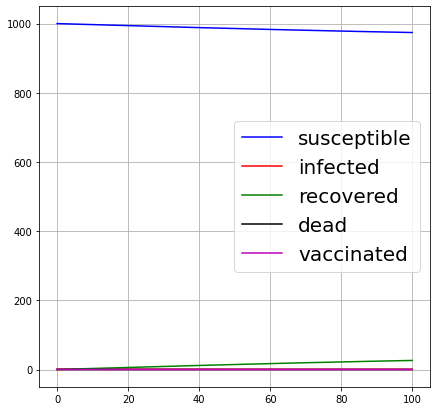

In [7]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.3, 'delta': 0, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=100, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
In this case, when $t=2$ the inequality $(*)$ holds. We can see in the graphic that the number of infected people stays very close to one. Therefore, there are very few infected people at the same time after $t=2$. This does not mean that new infections are not appearing, what it is telling us is that people are getting infected and recovery at a very similar rate as we can see with the blue and green line.
It is natural to ask whether the number of infected people will drop to zero before the susceptible number reach zero. To answer this question, we will increase the time of the simulation.  
</p>

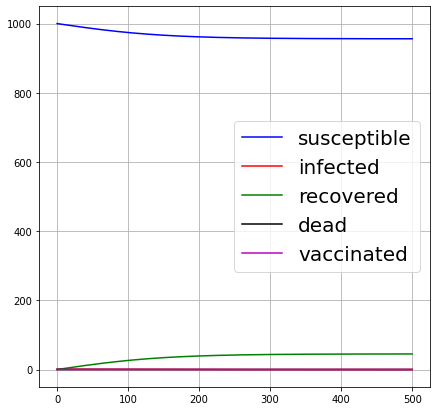

In [8]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.3, 'delta': 0, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=500, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
As we can see in the previous graphic, the number of recovered people became constant with the time before the susceptible amount reach zero. It is clear that the bigger $\frac{\mu}{\beta}$ is, the faster the recovered people became constant.
</p>
<br>
<p>
Let us study the case when $\frac{\mu} {\beta} < 1 $. For graphical reasons we set $\beta=0.3$ and $\mu = 0.05$. 
</p>

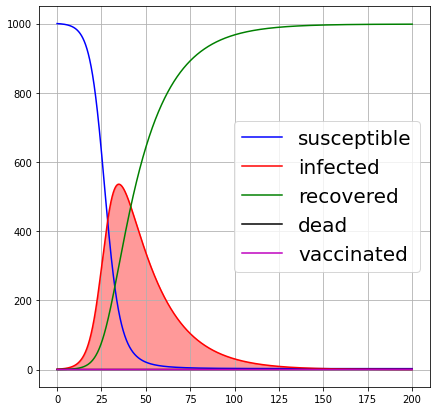

In [9]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

It is clear from the previous graphic that the smaller $\frac{\mu}{\beta}$ is, then is the bigger the maximum value of $I(t)$.

Now, by reducing $\beta$ we simulate the reduction on the contacts between infected and susceptible. Let us simulate a reduction to $\beta=0.2$.

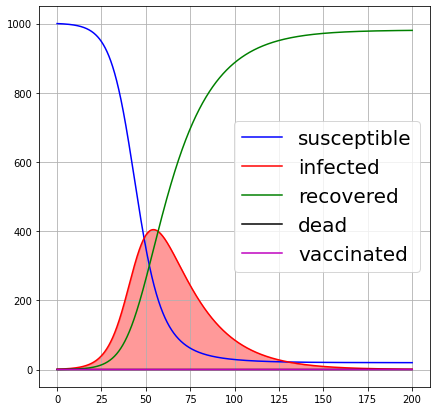

In [10]:
max_population = 1000
params = {'beta': 0.2, 'mu': 0.05, 'delta': 0, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
As we have seen in this section, when the virus is not deadly, the value of $\frac{\mu}{\beta}$ is the information that determines the highest amount of infected individuals and when the infection of new individuals stops.
</p>
<br>
<p align="justify">
From now on we will assume that the values of $\beta$ and $\mu$ are given by $0.3$ and $0.05$ respectively, and $\beta$ can be reduced to $0.2$ to simulate a reduction in the contacts between infected and susceptibles.
</p>

##A deadly virus without vaccine
<p align="justify">
In this section we will study the parameters of a deadly virus, i.e. $\delta \neq 0$. We will assume there is no vaccine for the virus, see next section for $\nu \neq 0$. In this section we will focus on the variation of $\delta$, at first sight we could think that the higher is $\delta$, the more dangerous is the virus, i.e. the the amount of dead individuals will be higher at the end of the simulation.
</p>
<br>
<p align="justify">
The first thing we noticed is that the inequality $(*)$ does not apply for the purposes of this section. Let us determine the equivalent of this inequality for this section.
</p>
<br>
<p align="justify">
In this case, the variation of infected people is given by     
$$\frac{d I}{dt}= \beta \frac{S(t)I(t)}{N} -\mu I(t) - \delta I(t).$$
Therefore, whether $I(t)$ decreases or increases depends on the whether $\frac{d I}{dt}$ is positive, negative or zero. So the infected people will start reducing when $$\beta \frac{S(t)I(t)}{N} -\mu I(t) -\delta I(t)< 0$$ since $I(t)> 0$, this is equivalent to $$(**)\ \ \ \ \ \ \beta \frac{S(t)}{N} < \mu + \delta.$$ Therefore $I(t)$ reach the biggest value when $S(t)=\frac{N(\mu +\delta)}{\beta}$. 
Let us take a close look to this with a population of $N=1000$ and an initial infected individual $I(0)=1$.
</p>

Let us start by simulating a mortality rate of $0.075$.

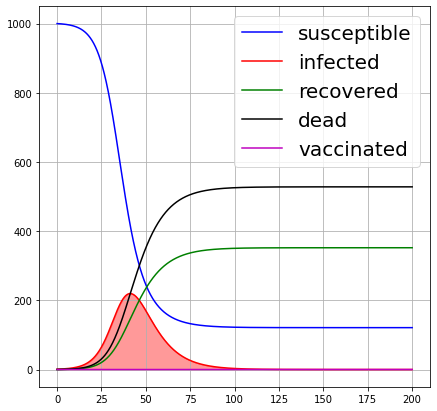

In [11]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.075, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
From the previous graphic we can see that at the end of the simulation the amount of dead individuals is over 500. At first sight we can think that if we double $\delta$, then the amount of dead individuals would increase. On the other hand, from the inequality $(**)$ we could conclude that if $\delta$ is double, then the amount of infected individuals starts reducing at an smaller $t$.
This observation can be explain by the fact that at a higher $\delta$ infected individuals have less time to infect others. On the other hand a smaller $\delta$ implies infected individuals have more time to infect other, but at the same time more time to increase the possibility to recover.
</p>
</br>
<p align="justify">
As we can see, it is not clear how the amount of dead individuals changes depending on the variation of $\delta$. To get a better understanding of this relation, let us run a simulation with $\delta=0.04$ and $\delta=0.15$. 
</p>

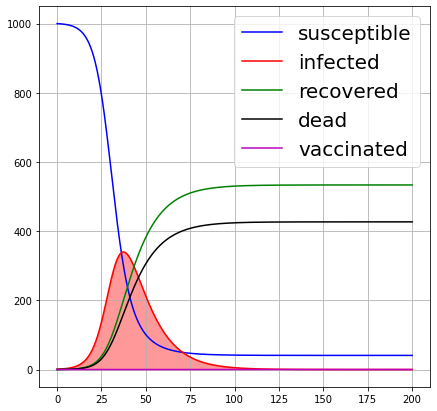

In [12]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.04, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

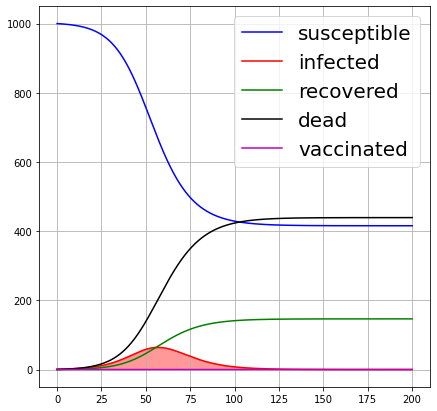

In [13]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.15, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
As we can see in the previous graphics, in both cases the amount of dead individuals at the end of the simulation is smaller than when $\delta=0.75$. In both cases the amount of dead individuals at the end of the simulation is very similar. One of the differences that we can see from the graphics is that when $\delta=0.04$ more people get recovered than when $\delta=0.15$. This means that more individuals got infected when $\delta=0.04$ and at the same time a similar amount of deaths. We conclude that it cannot be determined which case is more dangerous.
</p>
<br>
<p align="justify">
Let us assume that the value of $\delta$ is $0.075$. Now let us run the simulation when the contacts are reduced, i.e. $\beta=0.2$. First, let us recall the graphic when $\beta=0.3$, $\mu=0.05$, and $\delta=0.075$, after it we run the simulation with $\beta=0.2$.
</p>

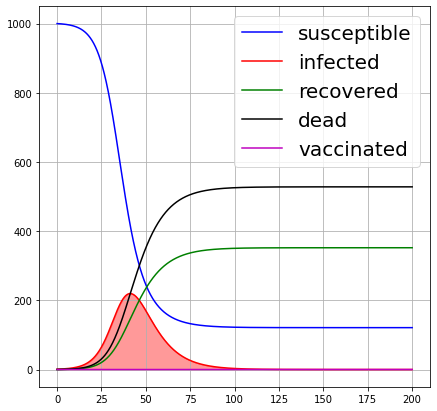

In [14]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.075, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

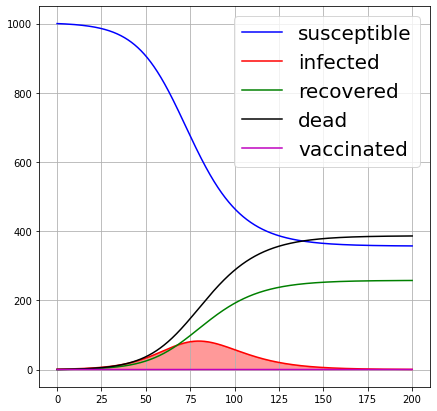

In [15]:
max_population = 1000
params = {'beta': 0.2, 'mu': 0.05, 'delta': 0.075, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
As we have seen in this section, when the virus is deadly without a vaccine, the value of $\frac{\mu + \delta}{\beta}$ is the information that determines the highest amount of infected individuals and when the infection of new individuals stops. But not much can be deduced from the variation of $\delta$.
</p>
<br>
<p align="justify">
From now on we will assume that the values of $\delta$ is $0.075$.
</p>

##A deadly virus with vaccination
<p align="justify">
In this section we will study the last parameter of our model, i.e. the vaccination rate $\nu \neq 0$. Even though a vaccination campaign is more complicated than only one parameter (effectiveness of the vaccine, speed of the vaccination campaign, etc), we will run a simplification of this by only having one parameter. In this section we will focus on the variation of $\nu$.
</p>
<br>
<p align="justify">
The first thing we noticed is that the inequality $(**)$ applies for the purposes of this section. This is because in our model the variation of the infected individuals is not explicitly related to the vaccination rate, the relation between the infected individuals and the vaccination rate comes from the variation of the susceptible individuals. Therefore we will focus on the variation of the susceptible individuals.
</p>
<br>
<p align="justify">
In this case, the variation of susceptible people is given by     
$$(***)\ \ \ \ \ \ \frac{d S}{dt}= -\beta \frac{S(t)I(t)}{N} -\nu S(t)$$
It is clear from (***) that $\frac{dS}{dt}$ is always negative unless $S(t)$ is zero, this can be easily seen from the fact that $$-\beta \frac{S(t)I(t)}{N}$$ is never positive and only zero when $S(t)$ or $I(t)$ is zero and $$-\nu S(t)$$ is never positive and only zero when $S(t)$. So $S(t)$ will decrease until it reach zero, it will decrease faster than in the previous case and as a consequence the maximum of $I(t)$ will be smaller than in the previous case.
</p>
<br>
<p align="justify">
Let us recall the graphic when $\beta=0.3$, $\mu=0.05$, $\delta=0.075$, and $\nu=0$.
</p>

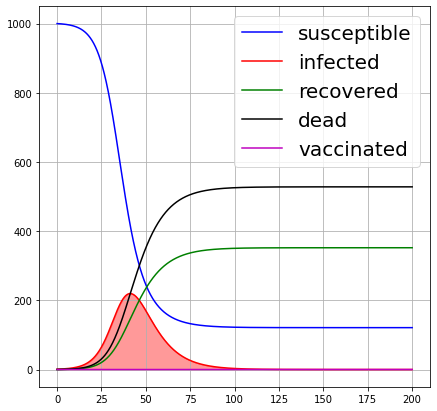

In [16]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.075, 'nu': 0, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

Let us take a close look when we set $\nu=0.01$.

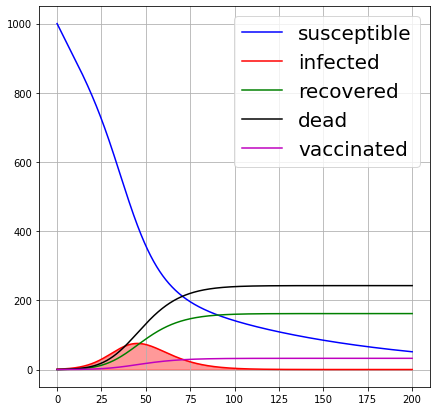

In [17]:
max_population = 1000
params = {'beta': 0.3, 'mu': 0.05, 'delta': 0.075, 'nu': 0.01, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
As we can see, the reduction on the amount of dead individuals and the infected population is notorious when $\nu=0.01$. Even though $\nu$ does not appear as a parameter in (**), a small variation on $\nu$ implies a notorious change on the maximum of $I(t)$ and more important on the maximum of $D(t)$. Let us finish by running a simulation when the contacts are reduced, i.e. $\beta=0.2$ and the vaccination rate is $0.01$. 
</p>

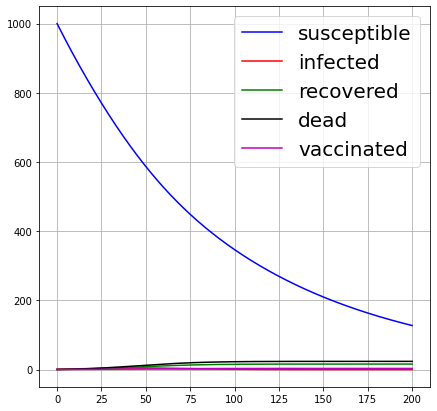

In [18]:
max_population = 1000
params = {'beta': 0.2, 'mu': 0.05, 'delta': 0.075, 'nu': 0.01, 'max_population': max_population}
init_condition = [max_population, 1, 0, 0, 0]
model = SIRDV_model(init_condition=init_condition, tmax=200, n = 50000, **params)
model.run_solver()
plt.figure(figsize=(7,7))
plt.plot(model.t, model.S, label = 'susceptible', color = 'b')
plt.plot(model.t, model.I, label = 'infected', color = 'r')
plt.plot(model.t, model.R, label = 'recovered', color = 'g')
plt.plot(model.t, model.D, label = 'dead', color = 'k')
plt.plot(model.t, model.V, label = 'vaccinated', color = 'm')
plt.fill_between(model.t, 0, model.I, color = 'r', alpha = 0.4)
plt.grid(True)
plt.legend(fontsize = 20)
plt.show()

<p align="justify">
After running simulations with different values on the parameters, we have seen that small changes on the parameters of the model may imply drastically changes on the simulation. Therefore, it is not possible to make trustable conclusion based on the variation of one parameter. In this notebook we have seen the importance of having the right values of the parameters and trustable data.  
</p>
<br>
<p align="justify">
Notice that this is a simple model in which many other parameters have been excluded, for example the natality rate, a segmentation of the population by age, etc.  
</p>